In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
df=pd.read_excel("usa.new.xlsx")

In [3]:
day=df['Date']

In [4]:
cases=df['Confirmed Cases']

In [5]:
df=df.groupby(df['Date']).sum()

In [6]:
df

,Confirmed Cases,Exposure under investigation,Total Deaths,Exposure in China,Exposure outside China
Date,,,,,
2020-02-03,153,6,1,123,24
2020-02-07,269,66,1,150,54
2020-02-11,393,146,1,165,84
2020-02-15,522,229,2,170,127
2020-02-19,920,570,3,174,180
2020-02-23,1745,965,17,178,626


In [7]:
df.reset_index()

,Date,Confirmed Cases,Exposure under investigation,Total Deaths,Exposure in China,Exposure outside China
0,2020-02-03,153,6,1,123,24
1,2020-02-07,269,66,1,150,54
2,2020-02-11,393,146,1,165,84
3,2020-02-15,522,229,2,170,127
4,2020-02-19,920,570,3,174,180
5,2020-02-23,1745,965,17,178,626


In [8]:
day=pd.Series([1,2,3,4,5,6])

In [9]:
df.set_index(day)

,Confirmed Cases,Exposure under investigation,Total Deaths,Exposure in China,Exposure outside China
1,153,6,1,123,24
2,269,66,1,150,54
3,393,146,1,165,84
4,522,229,2,170,127
5,920,570,3,174,180
6,1745,965,17,178,626


In [10]:
cases=df['Confirmed Cases']

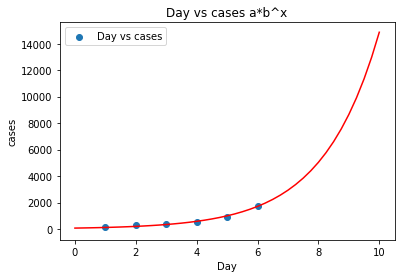

In [11]:
def func3(x, a, b):
    return a * b ** x
popt, pcov = curve_fit(func3, day,cases, p0=[1, 1e-6])


x_plot=np.linspace(0,10,41)
plt.plot(x_plot, func3(x_plot, *popt), 'r-')
plt.scatter(day,cases,label='Day vs cases')
plt.title("Day vs cases a*b^x")
plt.xlabel('Day')
plt.ylabel('cases')
plt.legend()
plt.show()


In [12]:
y_plot = func3(x_plot,*popt)

In [13]:
expDf=pd.DataFrame(list(zip(x_plot,y_plot)),columns=['day','predicted cases'])

In [14]:
expDf.to_csv(r'exp-usa.csv')